#  Boston Housing Values
## by (Eloebhose Kingsley Osazele)

## Introduction
> The aim of this project is to create different regression models for the purpose of predicting the median house values in the suburban Boston. The dataset used in the project is a classic dataset and more information about it is provided below.

## About Dataset

This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive [click to go to dataset](http://lib.stat.cmu.edu/datasets/boston).The dataset is small in size with only 506 observations and 14 features, which are listed below:

|Features|Context||:---|:---| CRIM|per capita crime rate by town
 ZN|proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS|proportion of non-retail business acres per town
 CHAS|Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX|nitric oxides concentration (parts per 10 million)
 RM|average number of rooms per dwelling
 AGE|proportion of owner-occupied units built prior to 1940
 DIS|weighted distances to five Boston employment centres
 RAD|index of accessibility to radial highways
 TAX|full-value property-tax rate per 10,000 dollars
 PTRATIO|pupil-teacher ratio by town
 B|1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT|percentage lower status of the population
 MEDV|Median value of owner-occupied homes in 1000's dollars

## Dataset and Libraries

We will start this project by importing the necessary python libraries that will be used through out the project and also importing our data and loading it into the pandas dataframe

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.formula.api as sm
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', delimiter = r"\s+", names=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Data Exploration

Before diving into creating models for predicting the Median Value of houses in Boston, we first need to understand our data, and ascertain whether we need to adjust it in order to create our model. To do this we will do the following:

- Use the Pandas Info() method to check the data types of the data, check how many rows and features we are dealing with and finally check for null values.
- Create a scatter plot to check for Linearity between the predictors and the response variable.
- Create a summary of the fitted model to check for multicollinearity
- Calculate the correlation and visualise it using the seaborn heatmap mathod.

In [3]:
# use the info() method to find out more about the dataset columns, null counts, total number of rows(observations)
# and the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


so, we can see that the dataset does not have any null values, and the data types are correct, so we will move to the next step which is to check the relationship between the features in the dataset.

C:\Users\zylus\AppData\Local\Temp\ipykernel_17000\1739454662.py:9: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=1)


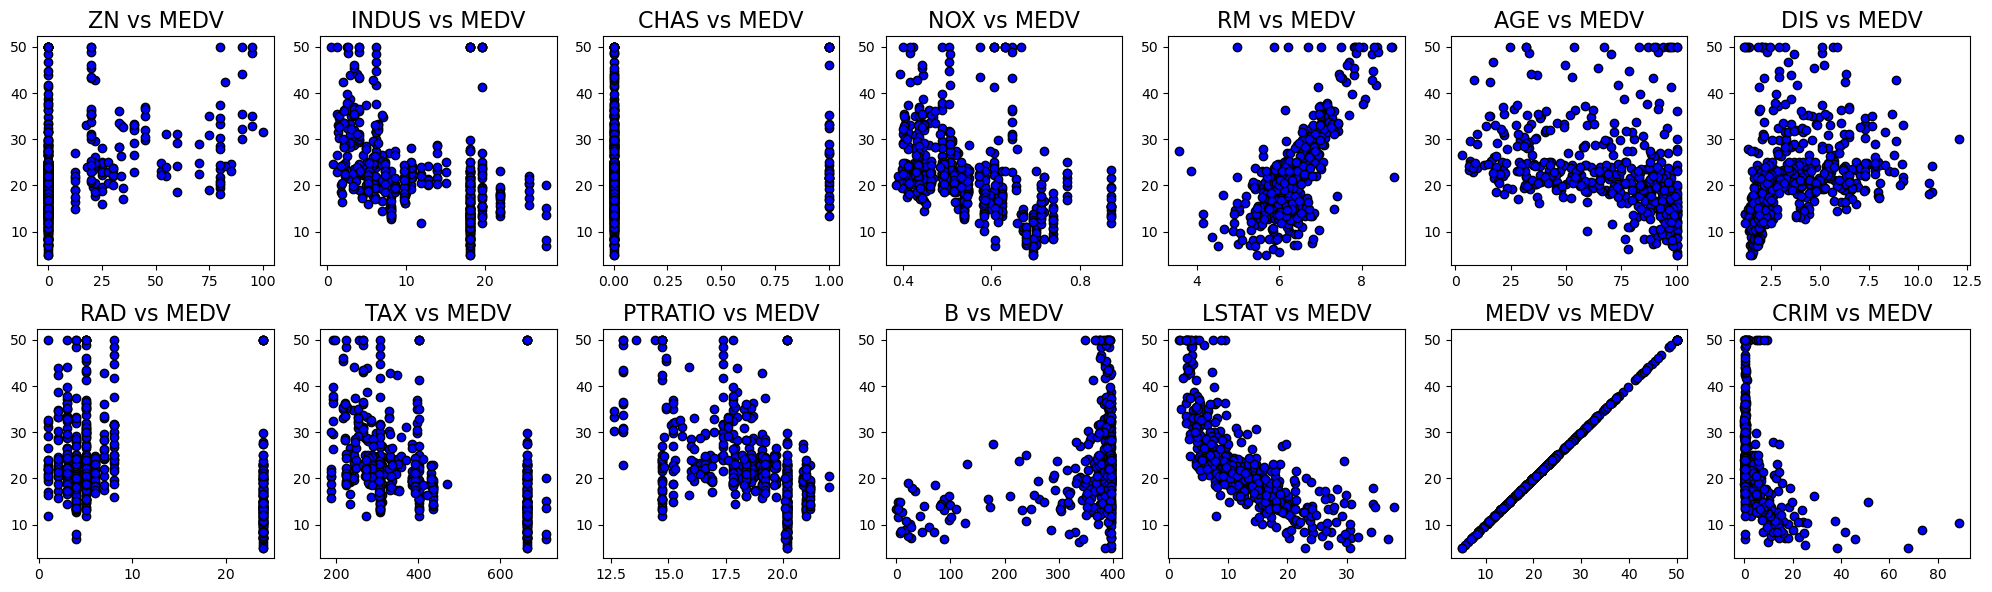

In [4]:
# Create a scatter plot to check for linearity between the response variable (MEDV) and the predictors
fig, axs = plt.subplots(2,7, figsize=(20,6))
fig.subplots_adjust(hspace = 0.5, wspace = .2)
axs = axs.ravel()

for index, column in enumerate(df.columns):
    axs[index-1].set_title("{} vs MEDV".format(column), fontsize=16)
    axs[index-1].scatter(x=df[column], y=df['MEDV'], color = "blue", edgecolor='k')
    fig.tight_layout(pad=1)

From the plots above, we can see that most of the predictors exhibit linear relationship with the response variable(MEDV)

In [5]:
# Create a fitted summary of the data to check for multicollinearity
formula_str = df.columns[-1]+'~'+'+'.join(df.columns[:13])
model = sm.ols(data=df, formula=formula_str)
fitted = model.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 23 May 2024   Prob (F-statistic):          6.72e-135
Time:                        11:00:48   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

**From the summary above, we can see that there is likelihood of multicollinearity, so one solution we can employ is using Ridge Regression or Lasso Regression , which can penalise large coefficients and mitigate multicollinearity. To check the perfromance of the model, other libraries will be used to build model and their performance will be evaluated against that of the Ridge models. But before going into model building, we would create a correlation matrix which can help us identify varaibles that are highly correlated with one another indicating multicollinearity**

In [6]:
# Calculating the correlation coefficients
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['MEDV'].sort_values(ascending=False)

# Display the correlations with the target variable
print("Correlation of features with Housing Values:\n", correlation_with_target)

Correlation of features with Housing Values:
 MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


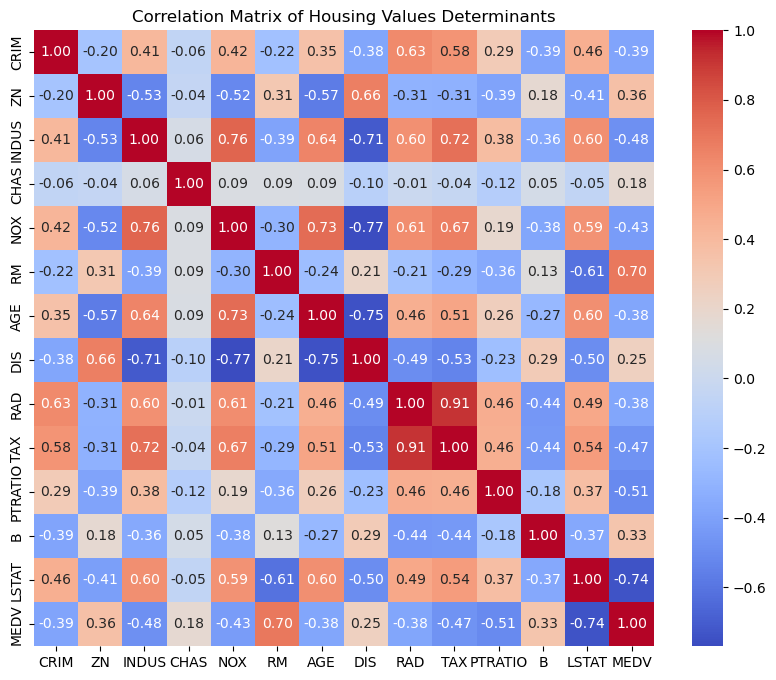

In [7]:
# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Housing Values Determinants')
plt.show()

They are various way to deal with multicollinearity, one way to deal with it is to look for highly correlated pairs of predictors and remove one of it, so from the matrix above, we can see that **RAD and TAX** are highly correlated, but we are going to use both correlation and level of significance to choose the variables we would use in our models. This will ensure that we are keeping the right variables.

Also, one important thing to note is that **LSTAT** has the highest correlation with our response variable **MEDV**, followed by the **RM** feature

In [8]:
# Get correlations
corrs = df.corr()['MEDV'].sort_values(ascending=True)

# Dictionary to store correlation coefficients and p-values
dict_cp = {}

# Extract column names excluding 'MEDV'
column_titles = [col for col in corrs.index if col != 'MEDV']

# Collect p-values and correlations
for col in column_titles:
    p_val = round(pearsonr(df[col], df['MEDV'])[1], 6)  # Calculate p-value
    dict_cp[col] = {'correlation_coefficient': corrs[col], 'p_value': p_val}  # Store in dict

# Convert the dictionary to a DataFrame
dict_cp_df = pd.DataFrame(dict_cp).T  # Transpose for better view
dict_cp_sorted = dict_cp_df.sort_values('p_value')  # Sort by p-value

# Filter rows where p-value is less than 0.1
dict_cp_filtered = dict_cp_sorted[dict_cp_sorted['p_value'] < 0.1]

print(dict_cp_filtered)


         correlation_coefficient   p_value
LSTAT                  -0.737663  0.000000
PTRATIO                -0.507787  0.000000
INDUS                  -0.483725  0.000000
TAX                    -0.468536  0.000000
NOX                    -0.427321  0.000000
CRIM                   -0.388305  0.000000
RAD                    -0.381626  0.000000
AGE                    -0.376955  0.000000
DIS                     0.249929  0.000000
B                       0.333461  0.000000
ZN                      0.360445  0.000000
RM                      0.695360  0.000000
CHAS                    0.175260  0.000074


so, from the above we can see that all the predictors are statistically significant. So, let us go into preprocessing of our data, that is preparing it for modeling. We are going to use Ridge and Lasso to build our models first because of the results we obtained when we displayed the fitted summary of the stats model ols

## Data Preprocessing

This step includes scaling the dataset using MinMaxScaler and splitting the Dataset into Training and testing sets

In [9]:
# First create a copy of our dataframe
data = df.copy()

# seperate the predictors and the response variables
x = data.drop('MEDV', axis = 1)
y = data['MEDV']
y_2d = np.array(y).reshape(-1, 1) 

# apply the MinMaxScaler
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

x_scaled = x_scaler.fit_transform(x)
y_scaled = y_scaler.fit_transform(y_2d)

#split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size = 0.2, random_state = 42)

# Convert the y_test to 2d and then to the original scale for model assessing purposes
y_test_2d = y_test.reshape(-1,1)

y_test_original = y_scaler.inverse_transform(y_test_2d)

## Model Training and Evaluation

### Simple Linear Regression Model

During the Data Exploration phase, we noticed that LSTAT(Lower status of the population) has the greatest correlation with the MEDV(Medain Value of Housing in Boston). So in creating our Simple Linear Regression model, we will consider our predictor to be LSTAT and the Response Variable to be MEDV

In [10]:
# Preparing data for simple linear regression
# for the simple linear regression model, we are going to seperate the single feature we will be using and convert to 2D array
X = np.array(data['LSTAT'])[:,np.newaxis]

#Initialize and apply MinMaxScaler for Scaling
X_scaler_lr = MinMaxScaler()
X_scaler_lr.fit(x,y)

# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model_lr = LinearRegression()
model_lr.fit(X_train, Y_train)

# Making predictions on the test data
y_pred_lr = model_lr.predict(X_test)

# Evaluating the model
print(f"R² Score: {r2_score(Y_test, y_pred_lr)}")
print(f"RMSE: {np.sqrt(mean_squared_error(Y_test, y_pred_lr))}")

R² Score: 0.5429180422970386
RMSE: 5.789606996393182


### Multiple linear regression model

Unlike the Simple Linear Regression that takes into account only one of the predictor variables, multiple Linear Regression takes into account more than one of the predictor variables, this helps the model to take into account other factors that maybe affecting the value of houses and in turn make better predictions

In [11]:
# Training the model
model_mlr = LinearRegression()
model_mlr.fit(x_train, y_train)

# Making predictions on the test data
y_pred_mlr = model_mlr.predict(x_test)

# Reshape the predictions to 2D before inverse_transform
predictions_scaled_2d_mlr = y_pred_mlr.reshape(-1, 1)

# Convert predictions back to original scale
predictions_original_mlr = y_scaler.inverse_transform(predictions_scaled_2d_mlr)
    

# Evaluate against the original scale test targets
print(f"R² Score: {r2_score(y_test_original, predictions_original_mlr)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_original, predictions_original_mlr))}")

R² Score: 0.6687594935356318
RMSE: 4.928602182665337


### Ridge Regression

In [12]:
# set the alpha perimeter for the Ridge regression
alphas = np.logspace(-3,3,100)
parameters = {'alpha':alphas}

# create the ridge regression using GridSearchCV so that the best alpha perimeter can be chosen for our model
ridge_regressor = GridSearchCV(Ridge(), parameters, scoring = 'r2', cv = 5)
ridge_regressor.fit(x_train, y_train)

# Convert the ridge regression prediction to 2d and then to the original scale
y_pred = ridge_regressor.predict(x_test)

y_pred_2d = y_pred.reshape(-1, 1)

# Rescale the y_test so that we can accurately interprete the results of the model
y_pred_original = y_scaler.inverse_transform(y_pred_2d)

print(f"optimal regularisation parameter : {ridge_regressor.best_params_}")
print(f"r2_score : {r2_score(y_test_original, y_pred_original)}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test_original, y_pred_original))}")

optimal regularisation parameter : {'alpha': 0.30538555088334157}
r2_score : 0.6729221596539456
RMSE : 4.897535647699185


### Lasso Regression

In [13]:
from sklearn.linear_model import LassoCV

lasso_regressor = LassoCV(cv = 5, random_state = 42)
lasso_regressor.fit(x_train, y_train)

y_pred_lasso = lasso_regressor.predict(x_test)

y_pred_lasso_2d = y_pred_lasso.reshape(-1, 1)

y_pred_lasso_original = y_scaler.inverse_transform(y_pred_lasso_2d)

r2_lasso = r2_score(y_test_original, y_pred_lasso_original)
features_used = np.sum(lasso_regressor.coef_ != 0)

print(f"optimal regularisation parameters : {lasso_regressor.alpha_}")
print(f"r2 score: {r2_lasso}")
print(f"Number of Features Used : {features_used}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test_original, y_pred_lasso_original))}")

C:\Users\zylus\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


optimal regularisation parameters : 3.016373111028129e-05
r2 score: 0.6688997183861818
Number of Features Used : 13
RMSE : 4.927558853650519


## Other Regression Models

In [14]:
def train_and_evaluate_model(model):
    
    # Train the model on the scaled training data
    model.fit(x_train, y_train)
    
    # Make predictions on the scaled test set
    predictions = model.predict(x_test)
    
    # Reshape the predictions to 2D before inverse_transform
    predictions_scaled_2d = predictions.reshape(-1, 1)

    # Convert predictions back to original scale
    predictions_original = y_scaler.inverse_transform(predictions_scaled_2d)
    

    # Evaluate against the original test targets
    r2 = r2_score(y_test_original, predictions_original)
    rmse = np.sqrt(mean_squared_error(y_test_original, predictions_original))
    
    return model, r2, rmse

### Decsion Tree

The decision tree model is a non_linear regression model. This model works by partioning data based on questions asked of the predictive features in the datasets.

In [15]:
# Training and evaluating the decision tree regression model
tree_model, tree_r2, tree_rmse = train_and_evaluate_model(DecisionTreeRegressor(random_state=42, max_depth=4))
print(f"Decision tree regression - R²: {tree_r2}, RMSE: {tree_rmse}")

Decision tree regression - R²: 0.8534484350883264, RMSE: 3.278289292152031


### Random Forest

In [16]:
# Training and evaluating the random forest regression model
forest_model, forest_r2, forest_rmse = train_and_evaluate_model(RandomForestRegressor(random_state=42, max_depth=4))
print(f"Random Forest Regression - R²: {forest_r2}, RMSE: {forest_rmse}")

C:\Users\zylus\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Regression - R²: 0.8570348473384649, RMSE: 3.2379276558878645


### Stacking Ensemble 

In [55]:
# Define the base models: these are models that have already been trained
base_models = [
    ('linear_regression', model_mlr),
    ('random_forest', forest_model)
]

# Define the meta-learner
final_estimator = LinearRegression()

In [56]:
# Training and evaluating the stacking regression model
stacking_model, stacking_r2, stacking_rmse = train_and_evaluate_model(StackingRegressor(estimators=base_models, final_estimator=final_estimator, cv=5))
print(f"Stacking Regression - R²: {stacking_r2}, RMSE: {stacking_rmse}")

C:\Users\zylus\anaconda3\Lib\site-packages\sklearn\ensemble\_stacking.py:955: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Stacking Regression - R²: 0.8636570186407325, RMSE: 3.162047853912473


*We have tried various models, so that we can choose the best that will assist in predicting the Median Housing Values in Boston. So, from assessing the different models created using the Root Mean Squared Error and the R2 Score, we can see that the best model for predicting the housing values in Boston is the Stacking Ensemble Model. The model uses Linear regression and random forest as its base learners and Linear regression as the final estimator, but we can see from the coefficient values that the random forest model does much better in contributing to the final predictions than the linear regression*

**Now let us see the predictor variables that have the most significant impact on the Median Housing Values in Boston**

In [26]:
# Before we check to see which predictor is most influential, we have to see which base model is contributing
# the most to the final predictions.
stacking_model.final_estimator_.coef_

array([0.31085382, 0.77023307])

**from the coefficients above, we can tell which base learner is contributing more to the predictions of the final model. We can see the the random forest model has greater impact on the predictions, having a coefficient of approximately 0.77, while the linear regression have a coefficient of 0.31**

In [51]:
# Get the Random Forest model from the base learners
rf_model = stacking_model.named_estimators_['random_forest']

# Get feature importances
feature_importances = rf_model.feature_importances_

# Match the feature importances with feature names
feature_names = data.columns.drop('MEDV')
feature_importance_dict = dict(zip(feature_names, feature_importances))
feature_importance_df = pd.DataFrame(feature_importances, index = feature_names, columns = 
                                     ['coefficients']).sort_values(by = 'coefficients', ascending=False)
feature_importance_df

,coefficients
RM,0.538376
LSTAT,0.329343
DIS,0.056265
CRIM,0.028952
PTRATIO,0.009963
NOX,0.009949
TAX,0.008336
AGE,0.005451
B,0.004807
RAD,0.003604


**From the Above, we can see that the top three predictor variables having the most effect on the median value of housing in Boston (MEDV) is the number of rooms per dwelling (RM), Lower status of population (LSTAT), and The weighted distances to five Boston employment centres (DIS), each having a coefficient of 0.54, 0.33, and 0.06. But it is obvious that the effect RM and DIS have on the response variable MEDV is far greater than the rest of the predictor variables**

## Conclusion

## Summary of Findings

**I was Interested in investigating and finding out about:**

- creating different regression models and find out the best by assessing their performance using the r2_score and the RMSE Metrics.
- Determine the predictor variables impacting the median housing value in Boston. 

**Data Exploration:**

- The variables in the dataset exhibit linearity, which is important for the different models to be successful in the prediction task

- They was presence of multicolinearity while using the OLS fitted summary, but after using correlation and level of significance, we realised that all variables were important.

- The reason for the detection of multicollinearity by the ols fitted summary while all the variables being importance can be due to the fact that linear regression is not flexible enough and can not fully capture the relationship between the features and the median housing values. This is further proven by the performance of the linear model as compared against the performance of the non linear models.

- We noticed from the correlation matrix that the LSTAT(Lower Status of the Population) and the RM(No of dwelling) are the highest correlated features with the median housing value (MEDV)

**Data Preprocessing:**

- The data was scaled using the MinMax Scaler from the Sklearn library and then splitted into training and testing sets

- The test set was converted back to the original scale since we would be using the RMSE metric for model assessment.

**Model Training and Evaluation:**

- Linear model (Simple linear model and multiple linear model) was first trained with the dataset. The result shows that the multiple linear model performed a lot better than the simple linear model, having an R2 score of 54% and 67% respectively for the simple linear model and the multiple linear model.

- Ridge and Lasso regression models were created since it is more flexible and better at dealing with multicollinearity than the simple linear and multiple linear model. The results showing the performance of the models proved the earlier statement correct. The Ridge(l2) and Lasso(l1) regression performance showed and r2_score of 67.3% and 67.0% respectively, which proved that the l1 and l2 models performed better at predicting the median value of housing in Boston than the linear models.

- non_linear models like decsion trees and random forest was used which performed better at predicting the median housing values than the ridge and lasso model, having an R2 score of 85.3% for Decision tree and 85.7% for random forest model.

- An heterogenous ensemble regression model (Stacking Ensemble) was used which used random forest and linear regression as it's base learners and Linear regression as the final estimator. The ensemble regression model is the best performing model with an R2 score of 86.4%

**Feature Importance**

- To get the features that most influence median housing value, we extracted the base learner that contributed the most to the final prediction of our best performing model (stacking ensemble model), and the important features were extracted.This shhowed us that **LSTAT (percentage lower status of the population)** and **RM (average number of rooms per dwelling)** are the most influential features for predicting the median housing values.